(array([1251, 1252, 1253, ..., 2497, 2498, 2499]),)


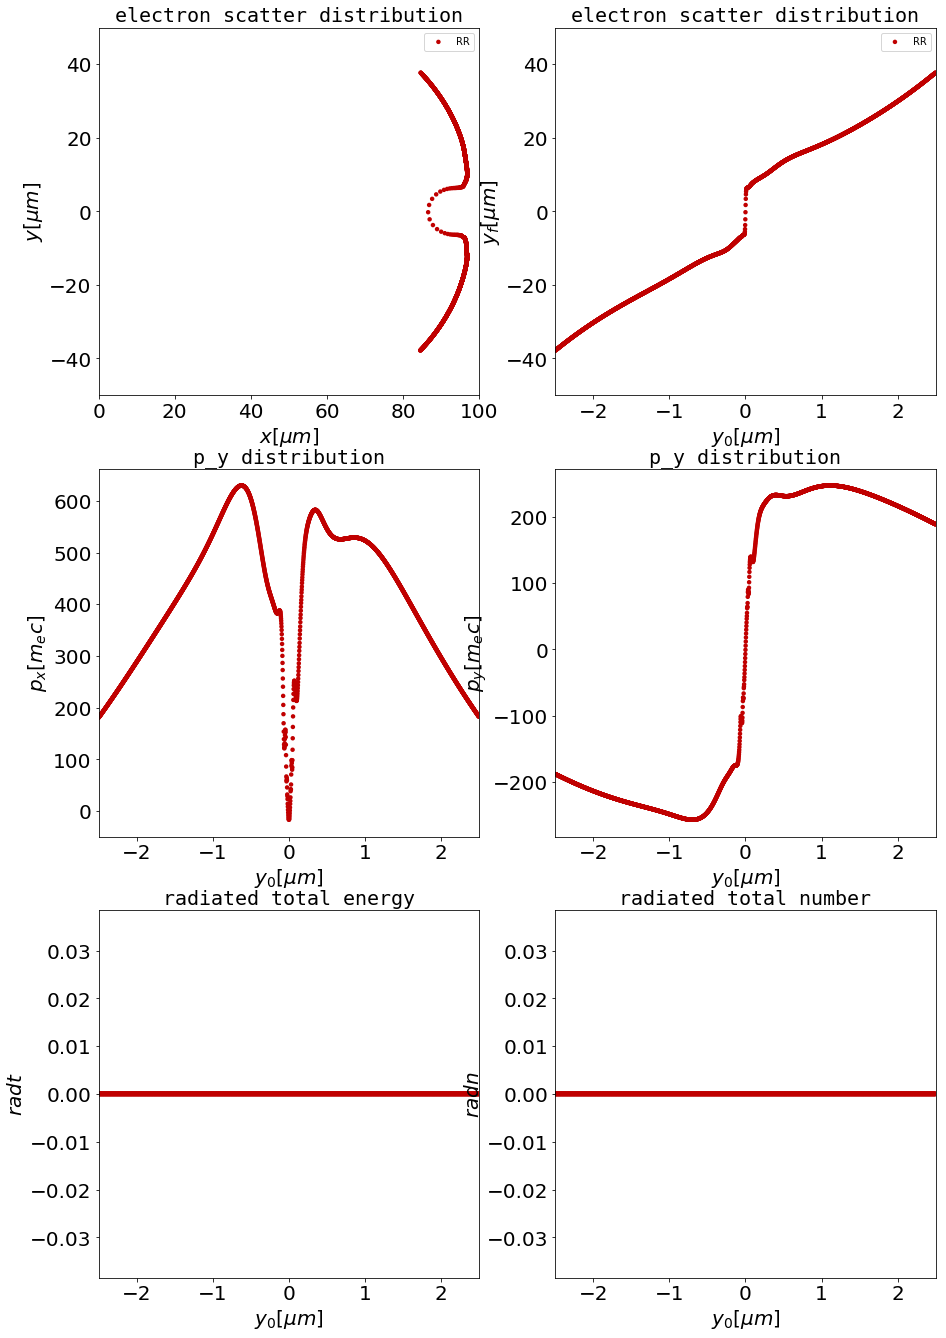

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=2500
nsteps=2

insert='./Data/'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')
opt=np.loadtxt(insert+'opt'+'.txt')
eta=np.loadtxt(insert+'eta'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)


makersize=20
plt.subplot(3,2,1)
plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(0.0,100.0)
plt.ylim(-50,50)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)

plt.subplot(3,2,2)
plt.scatter(y[:,0]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$y_f [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)

plt.subplot(3,2,3)
plt.scatter(y[:,0]/2/np.pi,px[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('p_y distribution',fontdict=font)

plt.subplot(3,2,4)
plt.scatter(y[:,0]/2/np.pi,py[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('p_y distribution',fontdict=font)

plt.subplot(3,2,5)
plt.scatter(y[:,0]/2/np.pi,radt[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radt$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total energy',fontdict=font)

plt.subplot(3,2,6)
plt.scatter(y[:,0]/2/np.pi,radn[:,-1],s=makersize,c=(192.0/255.0,0.0,0.0),edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('$y_0 [\mu m]$',fontdict=font)
plt.ylabel('$radn$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('radiated total number',fontdict=font)


fig = plt.gcf()
fig.set_size_inches(15, 23)
#fig.savefig(to_path+'scatter'+str(n).zfill(4)+'.png',format='png',dpi=60)


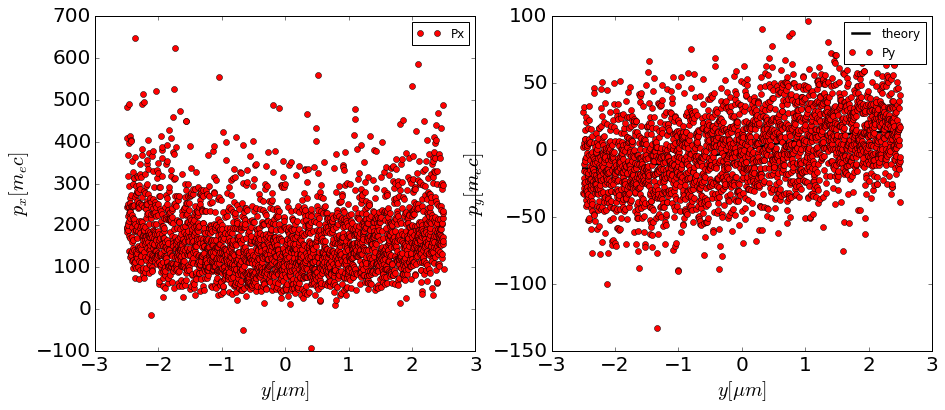

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }

part_number=2500
nsteps=2001

insert='q250_'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
ey=np.loadtxt(insert+'e_part'+'.txt')
bz=np.loadtxt(insert+'b_part'+'.txt')
ay=np.loadtxt(insert+'a_part'+'.txt')



t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
ey=np.reshape(ey,(part_number,nsteps))
ay=np.reshape(ay,(part_number,nsteps))
gamma=np.sqrt(px**2+py**2+1)

eta=1983.0
a_0=350
r_0=5.0
g_0=1000.0


T_y=np.linspace(-2.5,2.5,100,endpoint=True)

n=1
plt.subplot(121)
plt.plot(y[:,0]/2/np.pi,px[:,-1],'or',linewidth=2.5,label='Px')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_x [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(122)
from sympy import integrate,sin,exp  
from sympy.abc import x
#int=integrate((sin(x))**2*exp(-2*x**2/(3*2*np.pi)**2),(x,-10*2*np.pi,10*2*np.pi))

T_y=np.linspace(-2.5,2.5,100,endpoint=True)
T_py=a_0**2*4*T_y*np.exp(-2*T_y**2/r_0**2)/(2*g_0*r_0**2)*11.6/(4*np.pi)
plt.plot(T_y,T_py,'-k',linewidth=2.5,label='theory')
plt.plot(y[:,0]/2/np.pi,py[:,-1],'or',linewidth=2.5,label='Py')
plt.legend(loc='upper right')
#plt.xlim(93*2*np.pi,107*2*np.pi)
#plt.ylim(-50,50)
plt.xlabel('$y [\mu m]$',fontdict=font)
plt.ylabel('$p_y [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);

#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 6)

In [101]:

print(np.where(py[:,-1] > 0))
x.shape
py[75,-1]

(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


21.170856000000001

[  54.223511    6.775402   13.164993  129.52377   399.548146   70.786387
    2.480612   43.286358    4.638802    1.992805    4.102945   13.11308
    3.206735   13.202717    2.048833    1.089725]


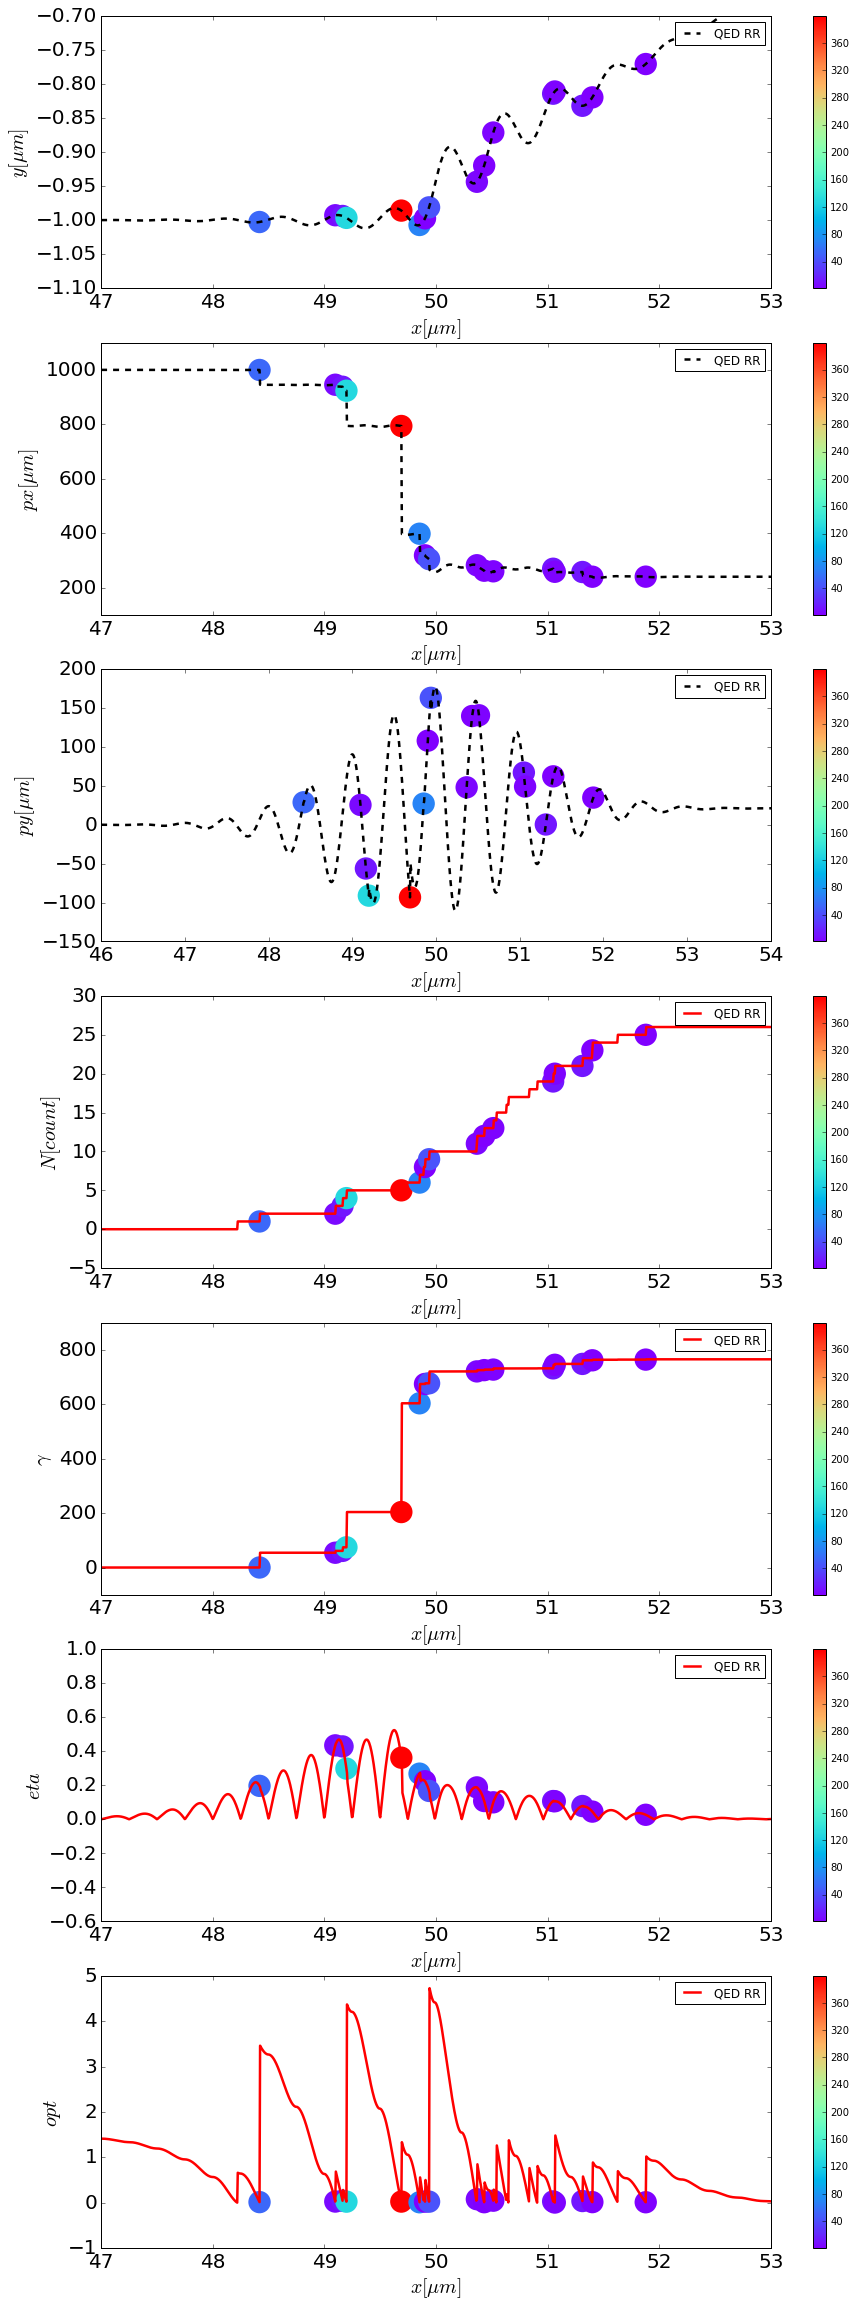

In [3]:
index=75

rrn=(radn[index,1:-1]-radn[index,0:-2])
rrt=(radt[index,1:-1]-radt[index,0:-2])
which=np.where(rrt >= 1)
rrn=rrn[which]
rrt=rrt[which]

plt.subplot(7,1,1)
plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,2)
plt.scatter(x[index,which]/2/np.pi, px[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,px[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$px [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,3)
plt.scatter(x[index,which]/2/np.pi, py[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,py[index,:],'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(46,54)
#plt.ylim(-1.1,-0.7)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$py [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,4)
plt.scatter(x[index,which]/2/np.pi, radn[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radn[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$N [count]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,5)
plt.scatter(x[index,which]/2/np.pi, radt[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,radt[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$\gamma$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,6)
plt.scatter(x[index,which]/2/np.pi, eta[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,eta[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$eta$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

plt.subplot(7,1,7)
plt.scatter(x[index,which]/2/np.pi, opt[index,which], c=rrt, s=500, cmap='rainbow', edgecolors='None')
plt.plot(x[index,:]/2/np.pi,opt[index,:],'-r',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.colorbar()
plt.xlim(47,53)
#plt.ylim(-1.5,-0.5)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$opt$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

#plt.show()
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(15, 40)
np.max(radn[index,1:-1]-radn[index,0:-2])
np.max(radt[index,1:-1]-radt[index,0:-2])
print(rrt)

In [63]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=100
nsteps=20002
insert='./Data/'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')
opt=np.loadtxt(insert+'opt'+'.txt')
eta=np.loadtxt(insert+'eta'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)
    
rrn=(radn[:,1:-1]-radn[:,0:-2])
rrt=(radt[:,1:-1]-radt[:,0:-2])

series=np.where(py[:,-1] > 10)

for index in np.reshape(series,(np.size(series),)):
    which=np.where(rrt[index,:] >= 1)
    plt.subplot(7,1,1)
    #print(rrt.shape,x[index,which].shape)
    plt.scatter(x[index,which]/2/np.pi, y[index,which]/2/np.pi, c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,y[index,:]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$y [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,2)
    plt.scatter(x[index,which]/2/np.pi, px[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,px[index,:],'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$px [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    plt.subplot(7,1,3)
    plt.scatter(x[index,which]/2/np.pi, py[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,py[index,:],'--k',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.1,-0.7)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$py [\mu m]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)
    
    plt.subplot(7,1,4)
    plt.scatter(x[index,which]/2/np.pi, radn[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,radn[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$N [count]$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,5)
    plt.scatter(x[index,which]/2/np.pi, radt[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,radt[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$\gamma$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,6)
    plt.scatter(x[index,which]/2/np.pi, eta[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,eta[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$eta$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    plt.subplot(7,1,7)
    plt.scatter(x[index,which]/2/np.pi, opt[index,which], c=rrt[index,which], s=500, cmap='rainbow', edgecolors='None')
    plt.plot(x[index,:]/2/np.pi,opt[index,:],'-r',linewidth=2.5,label='QED RR')
    plt.legend(loc='upper right')
    plt.colorbar()
    plt.xlim(48,52)
    #plt.ylim(-1.5,-0.5)
    plt.xlabel('$x [\mu m]$',fontdict=font)
    plt.ylabel('$opt$',fontdict=font)
    plt.xticks(fontsize=20); plt.yticks(fontsize=20);
    #plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

    #plt.show()
    #lt.figure(figsize=(100,100))
    fig = plt.gcf()
    fig.set_size_inches(10, 50)
    fig.savefig('./limit1/'+str(index).zfill(4)+'.png',format='png',dpi=60)
    plt.close("all")
    #np.max(radn[index,1:-1]-radn[index,0:-2])
    #np.max(radt[index,1:-1]-radt[index,0:-2])
    #print(rrt)

(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


(array([ 2,  5,  8,  9, 12, 13, 15, 16, 17, 18, 19, 22, 24, 28, 32, 33, 37,
       38, 39, 40, 42, 44, 45, 46, 48, 49, 50, 51, 57, 58, 59, 61, 63, 64,
       66, 68, 70, 73, 75, 76, 77, 82, 83, 86, 91, 94, 95, 98]),)


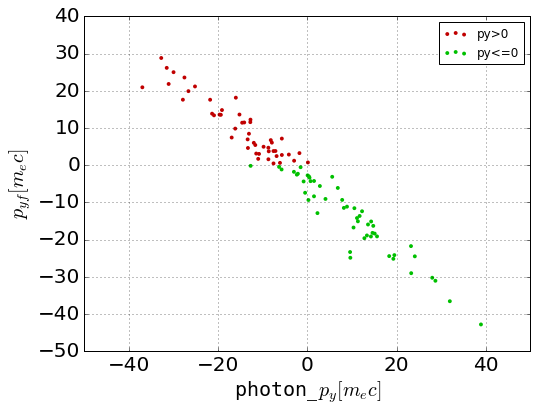

In [31]:
#index=75
rrn=(radn[:,1:-1]-radn[:,0:-2])
rrt=(radt[:,1:-1]-radt[:,0:-2])
#which=np.where(rrt[index,:] >= 1)
gamma=np.sqrt(px**2+py**2+1)
#photon_gamma=0;photon_px=0;photon_py=0;
photon_x=np.zeros(100);photon_y=np.zeros(100)
for ith in np.arange(100):
    photon_gamma=0;photon_px=0;photon_py=0
    index=ith
    which=np.where(rrt[index,:] >= 1)
    for i in np.reshape(which,(np.size(which),)):
        photon_gamma = gamma[index,i]-gamma[index,i+1]
        photon_px += photon_gamma*px[index,i]/np.sqrt(px[index,i]**2+py[index,i]**2)
        photon_py += photon_gamma*py[index,i]/np.sqrt(px[index,i]**2+py[index,i]**2)
    #print(ith,'photon_g=',photon_gamma,'photon_px=',photon_px,'photon_py=',photon_py,'py=',py[index,-1])
    #print(ith,'photon_px=',photon_px,'photon_py=',photon_py,'py=',py[index,-1])
    photon_x[ith]=photon_px;photon_y[ith]=photon_py;

#plt.subplot(3,2,6)
index=np.where(py[:,-1] > 0.0)
print(index)
plt.scatter(photon_y[index],py[index,-1],s=20,c=(192.0/255.0,0.0,0.0),label='py>0',edgecolors='None')
index=np.where(py[:,-1] <= 0.0)
plt.scatter(photon_y[index],py[index,-1],s=20,c=(0.0,192.0/255.0,0.0),label='py<=0',edgecolors='None')
plt.legend(loc='upper right')
plt.grid()
#plt.xlim(-2.5,2.5)
#plt.ylim(-50,50)
plt.xlabel('photon_$p_y [m_ec]$',fontdict=font)
plt.ylabel('$p_{yf} [m_ec]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.show()
#plt.figure(figsize=(100,100))
fig = plt.gcf()
fig.set_size_inches(8, 6)
#plt.title('radiated total number',fontdict=font)
#    print('px,',px[index,i-2:i+3],px[index,i+1])
#    print('py,',py[index,i-2:i+3],py[index,i+1])
#    print('gamma,',gamma[index,i-2:i+3],gamma[index,i+1])
#    print(i)
#(1000.04-945.86)
#photon_px=

In [16]:
10.0*9.1e-31*3.0e8/(2.0e4*1.6e-19)*2

1.7062500000000002e-06

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),)


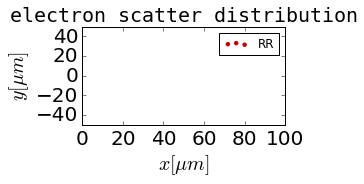

In [38]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
font = {'family' : 'monospace',
        'color'  : 'black',
        'weight' : 'normal',
        'size'   : 20,
        }
part_number=100
nsteps=20002

insert='./Data/'
t=np.loadtxt(insert+'t'+'.txt')
y=np.loadtxt(insert+'y'+'.txt')
x=np.loadtxt(insert+'x'+'.txt')
px=np.loadtxt(insert+'px'+'.txt')
py=np.loadtxt(insert+'py'+'.txt')
#ey=np.loadtxt(insert+'e_part'+'.txt')
#bz=np.loadtxt(insert+'b_part'+'.txt')
#ay=np.loadtxt(insert+'a_part'+'.txt')
radn=np.loadtxt(insert+'radn'+'.txt')
radt=np.loadtxt(insert+'radt'+'.txt')
opt=np.loadtxt(insert+'opt'+'.txt')
eta=np.loadtxt(insert+'eta'+'.txt')

t=np.reshape(t,(part_number,nsteps))
x=np.reshape(x,(part_number,nsteps))
y=np.reshape(y,(part_number,nsteps))
px=np.reshape(px,(part_number,nsteps))
py=np.reshape(py,(part_number,nsteps))
#ey=np.reshape(ey,(part_number,nsteps))
#ay=np.reshape(ay,(part_number,nsteps))
radn=np.reshape(radn,(part_number,nsteps))
radt=np.reshape(radt,(part_number,nsteps))
opt=np.reshape(opt,(part_number,nsteps))
eta=np.reshape(eta,(part_number,nsteps))

print(np.where(py[:,-1] > 0))

gamma=np.sqrt(px**2+py**2+1)


makersize=20
plt.subplot(3,2,1)
plt.scatter(x[:,-1]/2/np.pi,y[:,-1]/2/np.pi,s=makersize,c=(192.0/255.0,0.0,0.0),label='RR',edgecolors='None')
plt.legend(loc='upper right')
plt.xlim(0.0,100.0)
plt.ylim(-50,50)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
plt.title('electron scatter distribution',fontdict=font)
fig = plt.gcf()
fig.set_size_inches(8, 6)

(array([-10.,  -5.,   0.,   5.,  10.]), <a list of 5 Text yticklabel objects>)

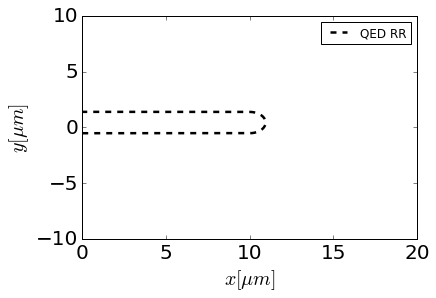

In [39]:
index=99
plt.plot(x[index,0:5500]/2/np.pi,y[index,0:5500]/2/np.pi,'--k',linewidth=2.5,label='QED RR')
plt.legend(loc='upper right')
plt.xlim(0,20)
plt.ylim(-10,10)
plt.xlabel('$x [\mu m]$',fontdict=font)
plt.ylabel('$y [\mu m]$',fontdict=font)
plt.xticks(fontsize=20); plt.yticks(fontsize=20);
#plt.title('electron at y='+str(round(y[n,0]/2/np.pi,4)),fontdict=font)

In [54]:
60.0*9.1e-31*3.0e8/(10.0e4*1.6e-19)*2

2.0475e-06

In [52]:
60.0/10.0*2/2.0/3.14

1.910828025477707

In [53]:
9.1e-31*3e8*2*3.14/1e-6/1.6e-19

10715.250000000002

In [55]:
10.0/1.0*2/2.0/3.14

3.184713375796178